In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\sriva\OneDrive\Documents\Spring'2022\Python\clean_data.csv")

In [5]:
#Selecting only the variables used for developing the models
df = df[['no_of_enrolled','outstate_tuition','no_of_FT','no_of_PT','PctTop10HS','PctTop25HS','pct_phd_faculty','pct_termianl_faculty','pct_alumni_donors','sf_ratio','total_misc_cost','accept_rate','is_private','grad_rate_round']]

In [6]:
cols = df.columns
cols

Index(['no_of_enrolled', 'outstate_tuition', 'no_of_FT', 'no_of_PT',
       'PctTop10HS', 'PctTop25HS', 'pct_phd_faculty', 'pct_termianl_faculty',
       'pct_alumni_donors', 'sf_ratio', 'total_misc_cost', 'accept_rate',
       'is_private', 'grad_rate_round'],
      dtype='object')

## Linearity

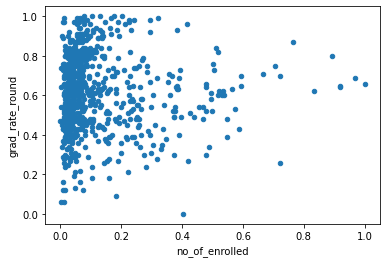

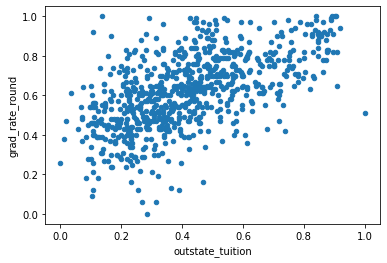

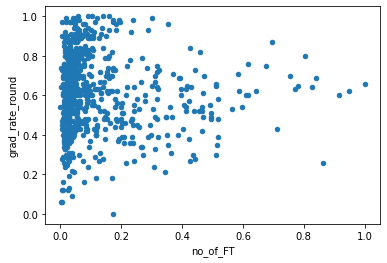

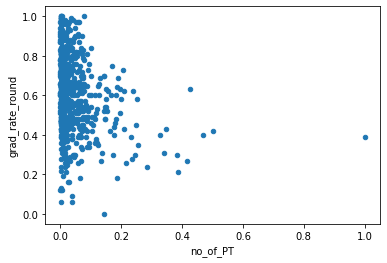

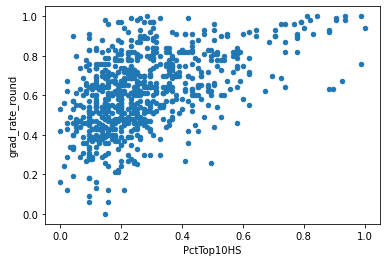

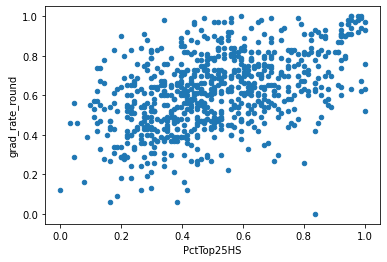

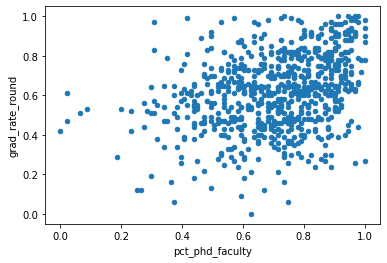

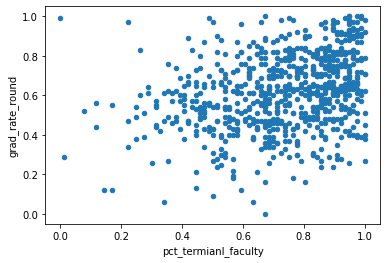

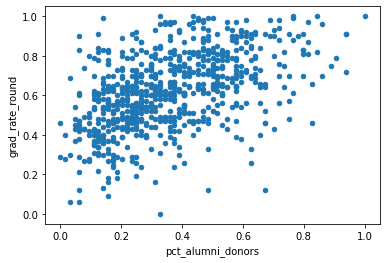

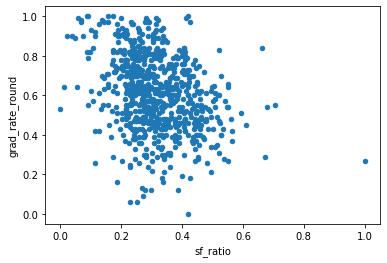

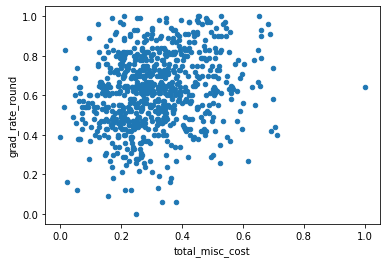

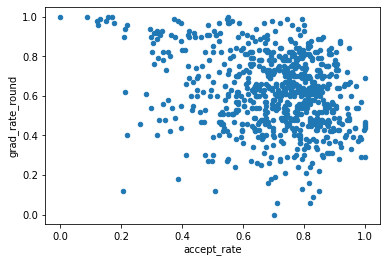

In [7]:
import matplotlib.pyplot as plt

for i in range(0,len(cols)-2):
    df.plot.scatter(x=cols[i],y='grad_rate_round')


## Correlation

In [8]:
df.corr()

,no_of_enrolled,outstate_tuition,no_of_FT,no_of_PT,PctTop10HS,PctTop25HS,pct_phd_faculty,pct_termianl_faculty,pct_alumni_donors,sf_ratio,total_misc_cost,accept_rate,grad_rate_round
no_of_enrolled,1.000000,-0.157174,0.964652,0.513191,0.189524,0.232154,0.340429,0.314369,-0.183716,0.240368,0.140650,-0.158731,-0.018020
outstate_tuition,-0.157174,1.000000,-0.217873,-0.251550,0.553843,0.480738,0.374949,0.397766,0.559586,-0.549043,0.416994,-0.216666,0.585124
no_of_FT,0.964652,-0.217873,1.000000,0.570537,0.149561,0.205480,0.326267,0.305416,-0.232451,0.282792,0.134823,-0.163944,-0.073658
no_of_PT,0.513191,-0.251550,0.570537,1.000000,-0.098769,-0.047469,0.158701,0.150673,-0.281787,0.233253,0.145184,-0.106067,-0.258640
PctTop10HS,0.189524,0.553843,0.149561,-0.098769,1.000000,0.891046,0.526114,0.486867,0.437856,-0.378152,0.292571,-0.450828,0.499327
PctTop25HS,0.232154,0.480738,0.205480,-0.047469,0.891046,1.000000,0.541333,0.521563,0.405437,-0.287045,0.266418,-0.414580,0.480471
pct_phd_faculty,0.340429,0.374949,0.326267,0.158701,0.526114,0.541333,1.000000,0.847218,0.242707,-0.122323,0.289430,-0.308729,0.330357
pct_termianl_faculty,0.314369,0.397766,0.305416,0.150673,0.486867,0.521563,0.847218,1.000000,0.262073,-0.153694,0.324143,-0.293380,0.309817
pct_alumni_donors,-0.183716,0.559586,-0.232451,-0.281787,0.437856,0.405437,0.242707,0.262073,1.000000,-0.394260,0.064783,-0.100552,0.494582
sf_ratio,0.240368,-0.549043,0.282792,0.233253,-0.378152,-0.287045,-0.122323,-0.153694,-0.394260,1.000000,-0.256085,0.097926,-0.319402


In [9]:
df.corr().to_csv('correlation.csv')

## Constant Variance: Homoscedasticity

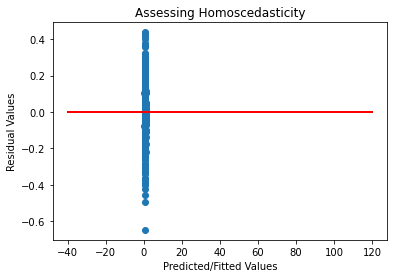

In [10]:
import statsmodels.formula.api as smf

linreg2 = smf.ols('grad_rate_round ~ no_of_enrolled + outstate_tuition + no_of_FT + no_of_PT + PctTop10HS + PctTop25HS + pct_phd_faculty + pct_termianl_faculty + pct_alumni_donors+ sf_ratio + total_misc_cost+ accept_rate', df).fit()

#Assess homoscedasticity
plt.scatter(linreg2.fittedvalues, linreg2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   #Add horizontal line
plt.show()

## Normally Distributed Residuals

((array([-3.11877034, -2.84737689, -2.69551019, -2.58819369, -2.50433879,
         -2.4350914 , -2.37586204, -2.32395351, -2.27764118, -2.23575318,
         -2.19745563, -2.16213333, -2.12931897, -2.09864895, -2.0698346 ,
         -2.04264276, -2.01688234, -1.99239466, -1.9690465 , -1.94672486,
         -1.92533303, -1.9047876 , -1.88501609, -1.86595512, -1.84754893,
         -1.82974819, -1.81250903, -1.79579228, -1.77956281, -1.76378896,
         -1.74844215, -1.73349642, -1.71892817, -1.70471586, -1.69083977,
         -1.67728181, -1.66402533, -1.651055  , -1.63835661, -1.62591705,
         -1.61372411, -1.60176647, -1.59003357, -1.57851556, -1.56720323,
         -1.55608797, -1.54516171, -1.53441686, -1.5238463 , -1.51344332,
         -1.50320159, -1.49311515, -1.48317838, -1.47338592, -1.46373275,
         -1.45421409, -1.44482538, -1.43556234, -1.42642086, -1.41739705,
         -1.4084872 , -1.39968779, -1.39099543, -1.38240693, -1.3739192 ,
         -1.36552931, -1.35723446, -1.

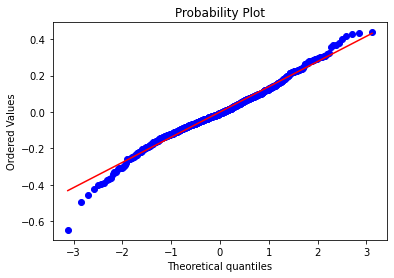

In [19]:
import scipy.stats as sts
sts.probplot(linreg2.resid, dist="norm", plot=plt)

## Independence

In [20]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        grad_rate_round   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     51.67
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           9.33e-90
Time:                        19:42:08   Log-Likelihood:                 421.91
No. Observations:                 763   AIC:                            -817.8
Df Residuals:                     750   BIC:                            -757.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3864      0.047      8.177      0.000       0.294       0.479
no_of_enrolled           0.2825      0.136      2.074      0.038       0.015       0.550
outstate_tuition         0.3159      0.040      7.886      0.000       0.237       0.395
no_of_FT                -0.1651      0.138     -1.199      0.231      -0.436       0.105
no_of_PT                -0.4600      0.094     -4.901      0.000      -0.644      -0.276
PctTop10HS              -0.0344      0.069     -0.499      0.618      -0.170       0.101
PctTop25HS               0.1531      0.054      2.835      0.005       0.047       0.259
pct_phd_faculty          0.1060      0.057      1.875      0.061      -0.005       0.217
pct_termianl_faculty    -0.0741      0.052     -1.436      0.152      -0.175       0.027
pct_alumni_donors        0.1970      0.035      5.687      0.000       0.129       0.265
sf_ratio                 0.0517      0.061      0.851      0.395      -0.068       0.171
total_misc_cost          0.0308      0.045      0.678      0.498      -0.058       0.120
accept_rate             -0.1163      0.035     -3.348      0.001      -0.184      -0.048
==============================================================================
Omnibus:                       21.636   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.963
Skew:                          -0.060   Prob(JB):                     6.34e-11
Kurtosis:                       4.209   Cond. No.                         70.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""